<a href="https://colab.research.google.com/github/Soumya1219/APPL-Capstone-Project/blob/main/HR_Analytics_Job_change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Predict the probability of a candidate looking for a new job**




## **Import required libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## **Loading Data**

In [ ]:
job_data = pd.read_csv("/content/aug_train.csv")

## **Creating a copy of data**

In [ ]:
data = job_data.copy()

In [ ]:
data

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## **Exploratory Data Analysis(EDA)**

In [ ]:
data.head()
# prints first 5 rows

In [ ]:
data.shape
# prints the no.of rows and columns

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
data.isnull().sum()
# prints the no.of null values in each column

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

### **We can observe that enrollee_id and city columns are not necessary to find whether the person would want a job change or not. So, we can remove those columns**

In [ ]:
data.drop("enrollee_id",axis=1,inplace = True)
# removes enrollee_id column

In [ ]:
data.drop("city",axis=1,inplace = True)
# removes city column

In [ ]:
data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
data["city_development_index"].sort_values()

13549    0.448
5265     0.448
10401    0.448
14913    0.448
16784    0.448
         ...  
6432     0.949
18753    0.949
1680     0.949
17479    0.949
12844    0.949
Name: city_development_index, Length: 19158, dtype: float64

In [ ]:
data['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

## **Data Cleaning**

### **We can observe that most of the values of gender column is 'Male'.**
### **Let's fill null values of gender column with "Male"**

In [ ]:
data['gender']=data["gender"].fillna("Male")

In [ ]:
data["enrolled_university"].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

### **We can observe that most of the values of enrolled_university column is 'no_enrollment'. Let's fill null values of enrolled_university column with "no_enrollment"**

In [ ]:
data['enrolled_university']=data["enrolled_university"].fillna("no_enrollment")

In [ ]:
data["education_level"].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

### **We can observe that most of the values of education_level column is 'Graduate'.Let's fill null values of education_level column with "Graduate"**

In [ ]:
data['education_level']=data["education_level"].fillna("Graduate")

In [ ]:
data["major_discipline"].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

### **We can observe that most of the values of major_discipline column is 'STEM'.Let's fill null values of major_discipline column with "STEM"**

In [ ]:
data['major_discipline']=data["major_discipline"].fillna("STEM")

In [ ]:
data["experience"].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [ ]:
data["experience"].replace({np.NaN:0,">20":22,"<1":0},inplace=True)
# replacing nan values,"<1" and with zeros and ">20" with 22  
data["experience"] = data["experience"].astype(int)
# Converting values of experience column into Integer type

In [ ]:
def experience_normal(x):    
    if x == 0:
        return 0
    elif 0 < x <= 3:
        return "JUNIOR"
    elif 3 < x <= 7:
        return "MIDDLE_EXPERIENCE"
    elif 7 < x <= 15:
        return "SENIOR"
    elif x > 15:
        return "DOMINATE_BUSINESS"
# Grouping values of experience column into 4 categories

In [ ]:
data["experience"] = data["experience"].apply(lambda x: experience_normal(x))

In [ ]:
data["company_type"].value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

### **We can observe that most of the values of company_type column is 'Pvt Ltd'.Let's fill null values of company_type column with "Pvt Ltd"**

In [ ]:
data['company_type']=data["company_type"].fillna("Pvt Ltd")

In [ ]:
data["company_size"].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

In [ ]:
def company_size_normal(x):
    if x == "<10":
        return "LOCAL"
    elif x == "50-99" or x == "10/49":
        return "SMALL"
    elif x == "100-500":
        return "MEDIUM_SCALE"
    elif x == "500-999":
        return "UPPER_SCALE"
    elif x == "1000-4999" or x == "5000-9999":
        return "EXTENDED"
    elif x == "10000+":
        return "LARGE_SCALE"
# Grouping values of company_size column into 6 categories

In [ ]:
data["company_size"] = data["company_size"].apply(lambda x: company_size_normal(x))

In [ ]:
data["company_size"].value_counts()

SMALL           4554
MEDIUM_SCALE    2571
LARGE_SCALE     2019
EXTENDED        1891
LOCAL           1308
UPPER_SCALE      877
Name: company_size, dtype: int64

### **We can observe that most of the values of company_size column is 'SMALL'.Let's fill null values of company_size column with "SMALL"**

In [ ]:
data['company_size']=data["company_size"].fillna("SMALL")

In [ ]:
data["last_new_job"].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

### **We can observe that most of the values of last_new_job column is 1. Let's fill null values of last_new_job column with 1**

In [ ]:
data['last_new_job'] = data["last_new_job"].fillna("1")

In [ ]:
data.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

# **Data visualization**

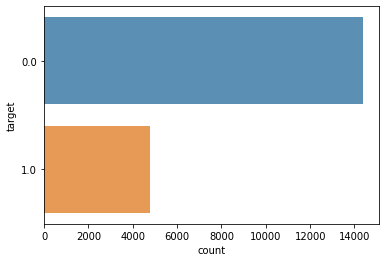

In [ ]:
ax = sns.countplot(y="target", data=job_data, alpha=0.8)
total = job_data.shape[0]

### **We can see that this data set is imbalanced Data set since only 25% of people in target data is looking for job change**

<Figure size 360x216 with 0 Axes>

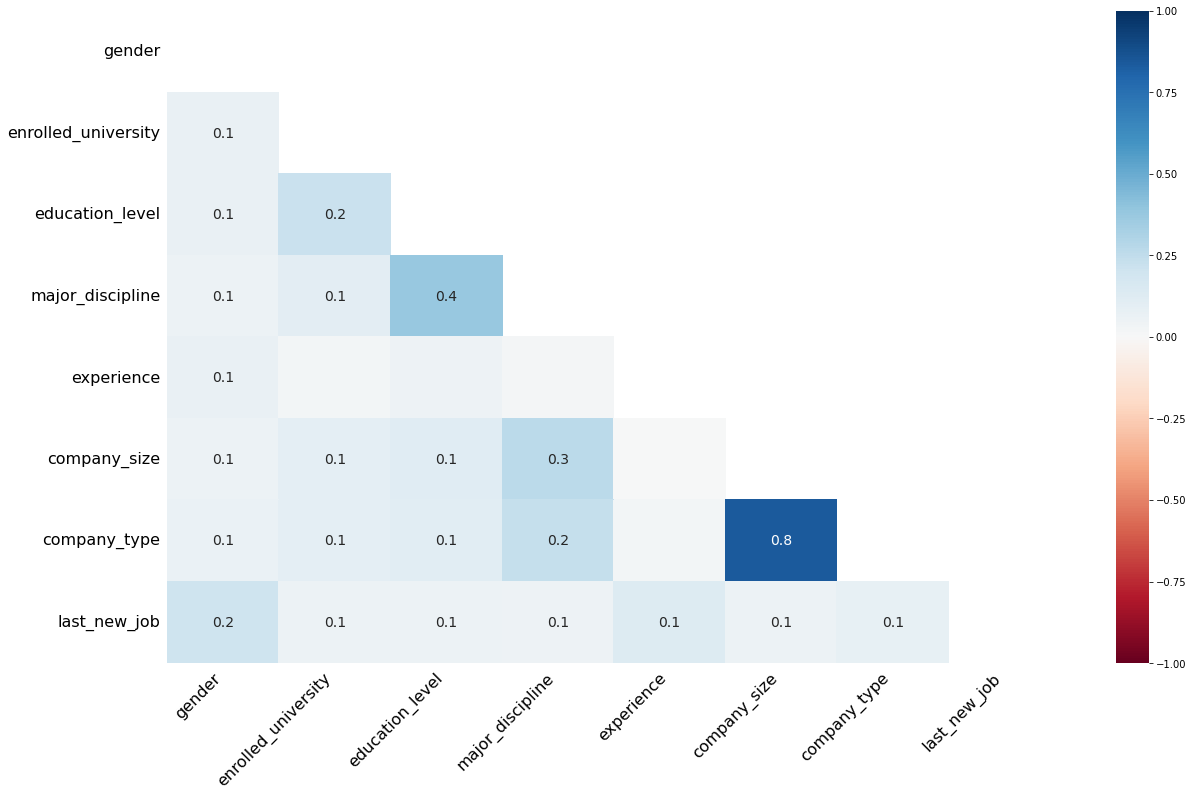

In [ ]:
plt.figure(figsize=(5,3))
msno.heatmap(job_data)


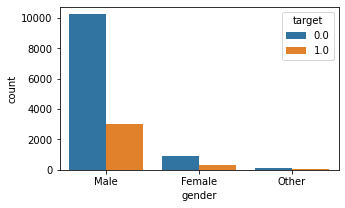

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='gender',hue='target',data=job_data)


### **In this graph Male propotion is higher and most of them are not looking for job change,it doesn't give any information.**

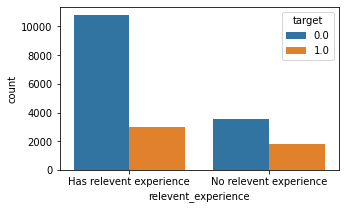

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='relevent_experience',hue='target',data=job_data)

### **According to above graph People who have relevant experience are not looking for job change.**

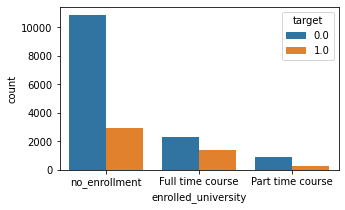

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='enrolled_university',hue='target',data=job_data)

### **On observing above graph we can see people who involved in full time courses are more likely to look for job change.**

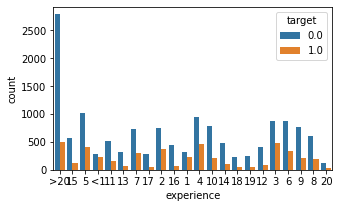

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='experience',hue='target',data=job_data)

### **By taking a glance on above graph people who have 1-6 years of experience are more likely looking for a job change when compared to the proportion of other experienced people.**

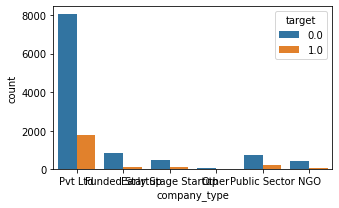

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='company_type',hue='target',data=job_data)

### **By observing above graph we can conclude that most of the people are from PVT Ltd**

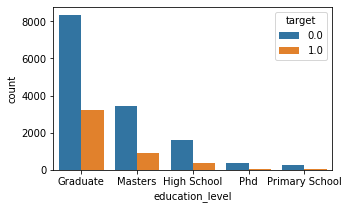

In [ ]:
plt.figure(figsize=(5,3))
sns.countplot(x='education_level',hue='target',data=job_data)

### **From above graph, we can observe that most of the members who are graduated are looking for job change.**

<Figure size 720x360 with 0 Axes>

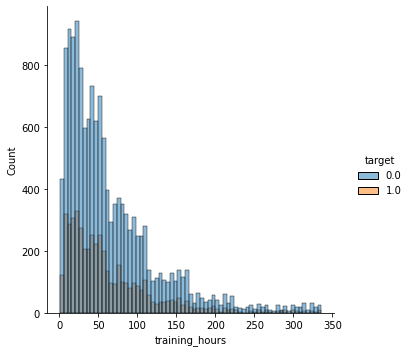

In [ ]:
plt.figure(figsize=(10,5))
sns.displot(x='training_hours',hue= 'target',data =job_data)

### **We can see that people having training hours of 0-50 are more likely looking for the job.**

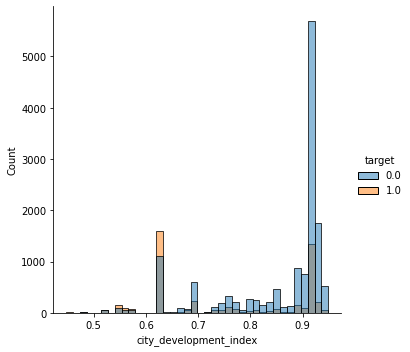

In [ ]:
sns.displot(x ='city_development_index',hue='target',data =job_data)

### **We can see that most of the people live in the city index near 0.9 doesn't look for the job change but the people living in city index near 0.6 more likely looking for job change.**

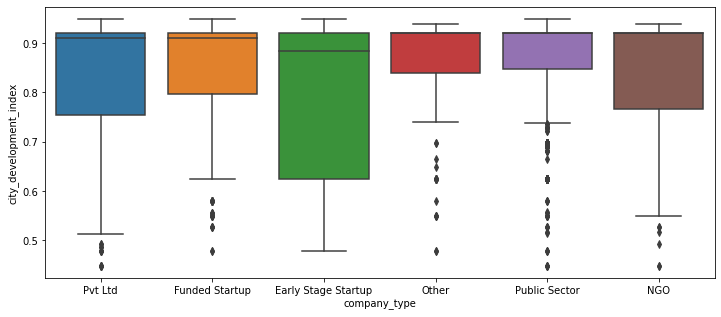

In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='company_type',y='city_development_index',data=job_data)

### **Here we can see most of the PVT Ltd,Funded startup companies are from city of index more than 0.9**

In [ ]:
data

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,SMALL,Pvt Ltd,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,SENIOR,SMALL,Pvt Ltd,>4,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,MIDDLE_EXPERIENCE,SMALL,Pvt Ltd,never,83,0.0
3,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,SMALL,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,DOMINATE_BUSINESS,SMALL,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19153,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,SENIOR,SMALL,Pvt Ltd,1,42,1.0
19154,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,SENIOR,SMALL,Pvt Ltd,4,52,1.0
19155,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,DOMINATE_BUSINESS,SMALL,Pvt Ltd,4,44,0.0
19156,0.802,Male,Has relevent experience,no_enrollment,High School,STEM,0,UPPER_SCALE,Pvt Ltd,2,97,0.0


### **Checking null values.**

In [ ]:
data.isnull().sum()

city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### **Pre-proccessing the data for modeling**

In [ ]:
lst_col_target = 'target'

In [ ]:
def encode(odf, fe):
    result = pd.get_dummies(odf,columns=fe,drop_first=True)
    return(result)

In [ ]:
string_cols = list(data.dtypes.index[data.dtypes == 'O'])

In [ ]:
string_cols

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [ ]:
X_cd = encode(data, str_cols)

In [ ]:
X_cd.head()

,city_development_index,training_hours,target,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_DOMINATE_BUSINESS,experience_JUNIOR,experience_MIDDLE_EXPERIENCE,experience_SENIOR,company_size_LARGE_SCALE,company_size_LOCAL,company_size_MEDIUM_SCALE,company_size_SMALL,company_size_UPPER_SCALE,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0.776,47,0.0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
2,0.624,83,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
3,0.789,52,1.0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
4,0.767,8,0.0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
X_cd.dtypes.value_counts()

uint8      33
float64     2
int64       1
dtype: int64

### **Split the data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_cd.drop(columns=['target']),X_cd['target'], test_size=0.20, random_state=42)

In [ ]:
X_train.sample(5)

,city_development_index,training_hours,gender_Male,gender_Other,relevent_experience_No relevent experience,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_DOMINATE_BUSINESS,experience_JUNIOR,experience_MIDDLE_EXPERIENCE,experience_SENIOR,company_size_LARGE_SCALE,company_size_LOCAL,company_size_MEDIUM_SCALE,company_size_SMALL,company_size_UPPER_SCALE,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
18032,0.776,34,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
405,0.754,20,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
990,0.897,256,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5079,0.827,77,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
17733,0.762,33,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


### **Train the model using Decision Tree Classifier**

In [ ]:

dct = tree.DecisionTreeClassifier(max_depth=5,min_samples_leaf=30)
dct.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dct.predict(X_test)
y_pred_1 = dct.predict_proba(X_test)[:,1]

###**Accuracy score for Decision Tree Classifier**

In [ ]:

accuracy_score(y_test, y_pred)

0.7677453027139874

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.90      0.85      2880
         1.0       0.55      0.37      0.44       952

    accuracy                           0.77      3832
   macro avg       0.68      0.63      0.65      3832
weighted avg       0.75      0.77      0.75      3832



### **Train the model using Random Forest**

In [ ]:

rnclf = RandomForestClassifier(max_depth=5,n_estimators=5, random_state=42 )

In [ ]:
rnclf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = clf.predict(X_test)
y_pred_1 = clf.predict_proba(X_test)[:,1]

In [ ]:
y_pred_1

array([0.13631032, 0.07302212, 0.178403  , ..., 0.51232582, 0.47149055,
       0.1211994 ])

###**Accuracy score for Random Forest**

In [ ]:

accuracy_score(y_test, y_pred)

0.7659185803757829

In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.93      0.86      2880
         1.0       0.56      0.27      0.37       952

    accuracy                           0.77      3832
   macro avg       0.68      0.60      0.61      3832
weighted avg       0.74      0.77      0.73      3832



### **Confusion Matrix**

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2677,  203],
       [ 694,  258]])

In [ ]:
data['target'].value_counts() / 100

0.0    143.81
1.0     47.77
Name: target, dtype: float64

## **From the above data we can clearly know that the probability for the people not looking for job change is more**.

# **Thank you.**